<a href="https://colab.research.google.com/github/crislmfroes/tensorflow-colab/blob/master/training_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.enable_eager_execution()

In [2]:
x = tf.zeros([10, 10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [0]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

In [0]:
class Model:
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
  def __call__(self, x):
    return self.W * x + self.b

In [0]:
model = Model()
assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

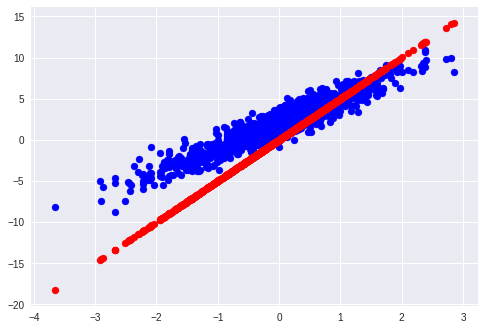

Perda atual: 
9.095414


In [10]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Perda atual: ')
print(loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Época  0: W=5.00 b=0.00 loss=9.09541
Época  1: W=4.61 b=0.42 loss=6.16937
Época  2: W=4.30 b=0.75 loss=4.30002
Época  3: W=4.05 b=1.01 loss=3.10551
Época  4: W=3.85 b=1.22 loss=2.34207
Época  5: W=3.68 b=1.39 loss=1.85403
Época  6: W=3.55 b=1.52 loss=1.54197
Época  7: W=3.44 b=1.63 loss=1.34240
Época  8: W=3.36 b=1.71 loss=1.21473
Época  9: W=3.29 b=1.77 loss=1.13305


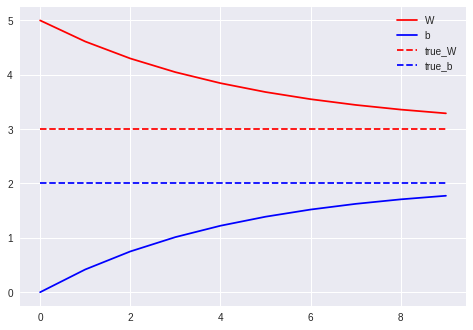

In [12]:
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  train(model, inputs, outputs, learning_rate=0.1)
  print('Época {:2d}: W={:1.2f} b={:1.2f} loss={:2.5f}'.format(epoch, Ws[-1], bs[-1], current_loss))
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true_W', 'true_b'])
plt.show()

In [0]:
#@title Apache 2.0 License
#Copyright 2018 Alphabet, Inc
#
#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.